In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas.api.types import CategoricalDtype

data = pd.read_csv('results.csv')
data = data.astype({
  'created_at': 'datetime64[s]', 
  'resolved_at': 'datetime64[s]',
  'created_at_quarter': 'string',
  'resolved_at_quarter': 'string', 
  'tier': CategoricalDtype(categories=['Gold', 'Silver', 'Bronze', 'unknown'], ordered=True),
  'labels': 'category'
  })


In [20]:
data['c_counter'] = (data['days_to_resolution'] * 0) + 1
data['c_count'] = data.groupby('repo')[['c_counter']].transform(sum)

# data = data.infer_objects()
# data.set_index('created_at_quarter')
# by_raq = data.sort_values('resolved_at_quarter').reset_index(drop=True)
# by_tier = data.sort_values('tier').reset_index(drop=True)
by_tier_contributions = data.sort_values(by=['tier', 'c_count'], ascending=[True, False])


In [21]:
data['labels'].cat.categories
data['labels'].cat
# data.dtypes

TypeError: Neither the `x` nor `y` variable appears to be numeric.

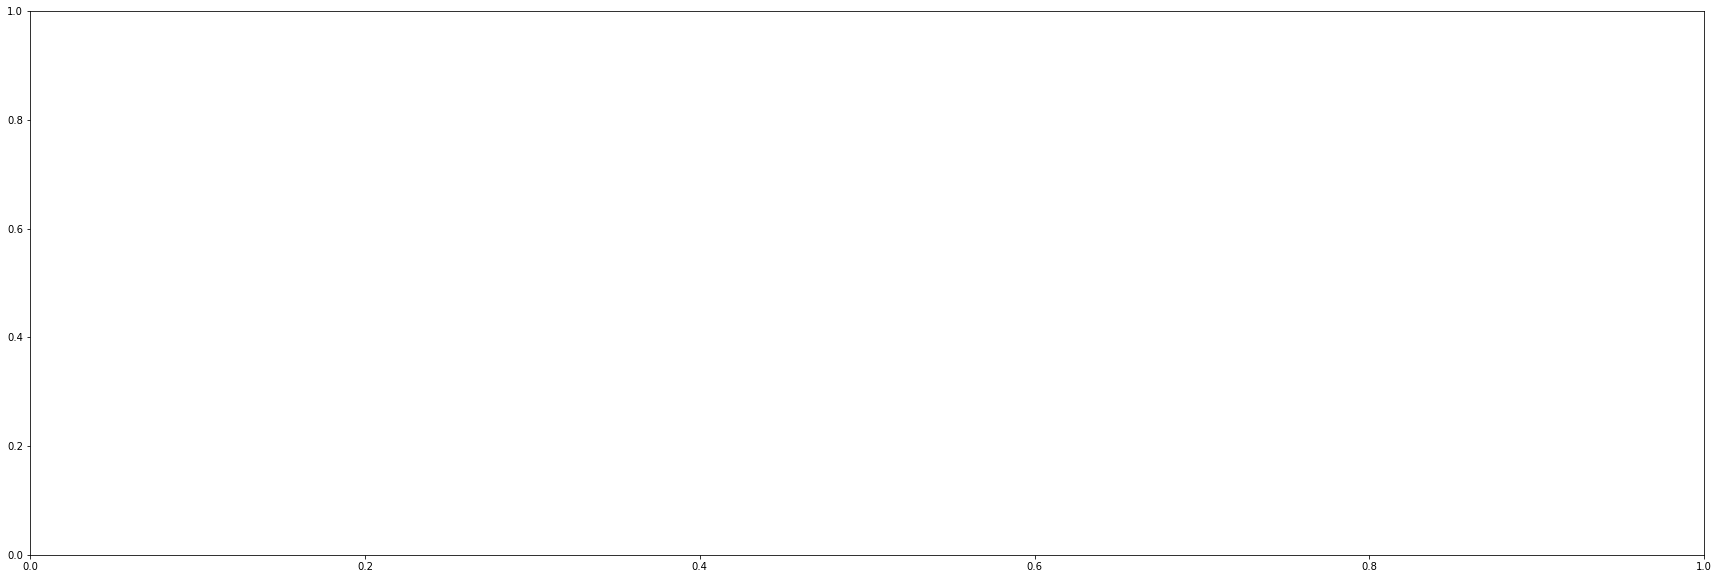

In [22]:


by_labels = data.sort_values(by=['resolved_at_quarter', 'labels'])


import seaborn as sns
import matplotlib.pyplot as plt

from numpy import median, sum, count_nonzero

fig, axs = plt.subplots(nrows=1, figsize=(30,10))
repo_chart = sns.barplot(x="resolved_at_quarter", y='labels', data=by_labels, ax=axs)
repo_chart.set_xticklabels(repo_chart.get_xticklabels(), rotation=45, horizontalalignment='right')


<AxesSubplot:label='4b178491-75e2-4707-8d61-14affc901c35', xlabel='repo', ylabel='c_counter'>

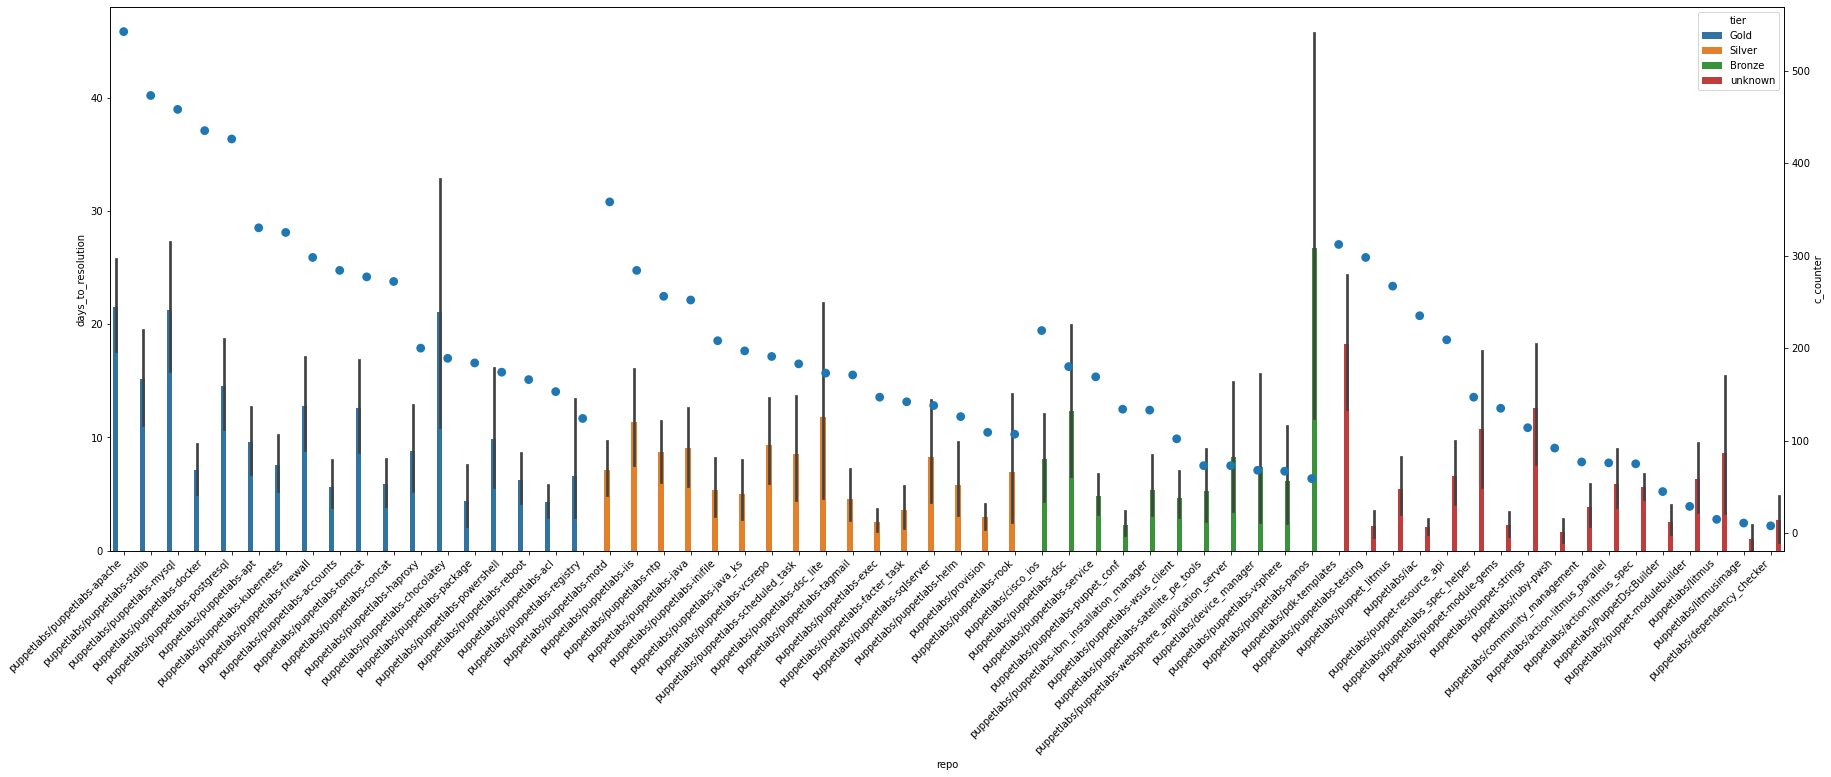

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import median, sum, count_nonzero

fig, axs = plt.subplots(nrows=1, figsize=(30,10))
# sns.violinplot(x="resolved_at_quarter", y="days_to_resolution", data=by_raq, ax=axs[0])
# sns.pointplot(x="resolved_at_quarter", y="days_to_resolution", data=by_raq, ax=axs[1])
# # sns.pointplot(x="resolved_at_quarter", y="days_to_resolution", estimator=median, data=raq, ax=axs[2])
# sns.barplot(x="tier", y="days_to_resolution", data=data, ax=axs[2], order=['Gold', 'Silver', 'Bronze'])
# sns.barplot(x="tier", y='contribution_count', estimator=sum, data=data, ax=axs[0], order=['Gold', 'Silver', 'Bronze'])
repo_chart = sns.barplot(x="repo", y='days_to_resolution', hue='tier', hue_order=['Gold', 'Silver', 'Bronze', 'unknown'], data=by_tier_contributions, ax=axs)
repo_chart.set_xticklabels(repo_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

sns.pointplot(x="repo", y='c_counter', estimator=sum, data=by_tier_contributions, ax=axs.twinx(), join=False)


In [ ]:

by_tier_contributions


,created_at,created_at_quarter,repo,repo_tag,created_by,affiliation,resolved_at,resolved_at_quarter,merged_by,merged_aff,resolution,days_to_resolution,created_in_lockdown,resolved_in_lockdown,tier,labels,c_counter,c_count
23,2019-07-16 07:03:14,2019-Q3,puppetlabs/puppetlabs-apache,module,lionce,iac,2019-07-16 09:35:57,2019-Q3,carabasdaniel,iac,merged,0.106053,pre-pandemic,pre-pandemic,Gold,NaN,1.0,542.0
161,2019-08-15 08:22:11,2019-Q3,puppetlabs/puppetlabs-apache,module,sheenaajay,iac,2019-08-15 08:33:48,2019-Q3,sheenaajay,iac,rejected,0.008067,pre-pandemic,pre-pandemic,Gold,NaN,1.0,542.0
226,2019-08-05 09:05:05,2019-Q3,puppetlabs/puppetlabs-apache,module,aukesj,community,2019-08-20 19:58:22,2019-Q3,ThoughtCrhyme,iac,merged,15.453669,pre-pandemic,pre-pandemic,Gold,NaN,1.0,542.0
252,2019-08-27 14:39:30,2019-Q3,puppetlabs/puppetlabs-apache,module,tphoney,iac,2019-08-28 10:42:32,2019-Q3,sheenaajay,iac,merged,0.835440,pre-pandemic,pre-pandemic,Gold,NaN,1.0,542.0
280,2019-08-08 14:40:12,2019-Q3,puppetlabs/puppetlabs-apache,module,sheenaajay,iac,2019-08-30 09:53:42,2019-Q3,sheenaajay,iac,rejected,21.801042,pre-pandemic,pre-pandemic,Gold,NaN,1.0,542.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9149,2019-03-22 14:41:56,2019-Q1,puppetlabs/dependency_checker,tool,eimlav,iac,2019-03-22 14:55:12,2019-Q1,david22swan,iac,merged,0.009213,pre-pandemic,pre-pandemic,unknown,NaN,1.0,8.0
9662,2021-01-29 13:49:56,2021-Q1,puppetlabs/dependency_checker,tool,dependabot-preview[bot],bot,2021-02-01 09:04:27,2021-Q1,DavidS,iac,merged,2.801748,pandemic,pandemic,unknown,NaN,1.0,8.0
10332,2019-04-26 12:30:09,2019-Q2,puppetlabs/dependency_checker,tool,eimlav,iac,2019-04-26 12:55:51,2019-Q2,pmcmaw,iac,merged,0.017847,pre-pandemic,pre-pandemic,unknown,NaN,1.0,8.0
10846,2021-03-30 09:23:46,2021-Q1,puppetlabs/dependency_checker,tool,david22swan,iac,2021-03-30 12:30:06,2021-Q1,pmcmaw,iac,merged,0.129398,pandemic,pandemic,unknown,NaN,1.0,8.0
